# Computer Science 2XC3 - Graded Lab II

Please refer to the pdf for detailed instructions. The below file contains all the preliminary code you will need to work on the lab. You can copy paste instructions here to create one cohesive lab and organize it that best suits your teams workflow. 

In [229]:
import random
import timeit 
import matplotlib.pyplot as plt
import numpy as np
import math
from collections import deque
from collections import defaultdict
from itertools import combinations


In [230]:
class Graph:

    # using hash map
    def __init__(self, edges):
        self.graph = {}
        for x,y in edges:
            if x not in self.graph.keys():
                self.graph[x]=[]
            self.graph[x].append(y)

    def has_edge(self, src, dst):
        return src in self.graph[dst]

    def get_graph_size(self,):
        return len(self.graph)
    
    def get_graph(self,):
        return self.graph

In [231]:
class GraphII:

    # using adjacency list
    def __init__(self, nodes):
        self.graph = []
        # node numbered 0-1
        for node in range(nodes):
            self.graph.append([])
        
    def has_edge(self, src, dst):
        return src in self.graph[dst]
    
    def add_edge(self,src,dst):
        if not self.has_edge(src,dst):
            self.graph[src].append(dst)
            self.graph[dst].append(src)
    
    def get_graph(self,):
        return self.graph

In [232]:
def depth_first_search(G,node,end_point=None):
    stack = [node]
    graph = G.get_graph()
    seen=set()

    while len(stack) !=0:
        node = stack.pop()
        # search for neighbours in graph
        if node not in seen:
            seen.add(node)
            print("Visited node:" + str(node))
            # if the given node has an edge
            if node in graph.keys():
                # iterate over edges of node
                for nn in graph[node]:

                    # limited traversal
                    if nn == end_point:
                        return True
                    # add to stack
                    stack.append(nn)

In [233]:
#Breadth First Search
def breadth_first_search(G, node):
    stack = [node]
    graph = G.get_graph()
    seen=set()

    seen.add(node)

    while len(stack) > 0:
        node = stack[0]
        stack = stack[1:]
        print("Visiting node: " + str(node))
        if node in graph.keys():
            for nn in graph[node]:
                #if node == node2:
                #    return True
                if nn not in seen:
                    stack.append(nn)
                    seen.add(nn)

## Part 1
### 1.1


In [234]:
#Part 1.1 BSF2

def BFS_2(Graph, startingNode, target):
    #Initialize a queue with a tuple containing the starting node and the path 
    trackPath = [(startingNode, [startingNode])]
    #to keep track of visited nodes
    seen = set()
    G = Graph.get_graph()
    #Checks if starting node is target.
    if startingNode == target:
        return [startingNode]

    while trackPath:
        (current, finalPath) = trackPath.pop(0)
        #Marks nodes which havnt been iterated through
        if current not in seen:
            seen.add(current)
            if current == target:
                return finalPath
            #If current node is not taget, iterate through its neighbors. 
            for neighbor in G.get(current, []):
                if neighbor not in seen:
                    #New path with neighbor node in it.
                    updatePath = finalPath + [neighbor]  
                    trackPath.append((neighbor, updatePath))

    # If we exit the while loop without returning, no path to the target was found
    return []


In [235]:
#Test case for 1.1 BFS2

edges = [
    (1, 2),
    (1, 3),
    (2, 4),
    (3, 4),
    (4, 5)
]
graph = Graph(edges)
path = BFS_2(graph, 1, 5)
print("Path from 1 to 5:", path)


Path from 1 to 5: [1, 2, 4, 5]


In [236]:
#1.1 DFS2
def DFS_2(Graph, startingNode, target):
    #Initialize a queue with a tuple containing the starting node and the path 
    stack = [(startingNode, [startingNode])]
    #to keep track of visited nodes
    seen = set()
    G = Graph.get_graph()
    #Checks if starting node is target.
    if startingNode == target:
        return [startingNode]  
    

    while stack:
        current, path = stack.pop()
        if current == target:
            return path 
        #Marks nodes which havnt been iterated through
        if current not in seen:
            seen.add(current)
            for neighbor in G.get(current, []):
                if neighbor not in seen:
                    stack.append((neighbor, path + [neighbor]))

    return None


In [237]:
#Test case for 1.1 DFS2

edges = [
    (1, 2),
    (1, 3),
    (2, 4),
    (3, 4),
    (4, 5),
    (5, 6)  # Adding an extra node for depth
]
graph = Graph(edges)
path = DFS_2(graph, 1, 6)

print("Path from 1 to 6:", path)


Path from 1 to 6: [1, 3, 4, 5, 6]


### 1.2

In [238]:
#1.2 BFS3

def BFS3(graph, start):
    trackPath = deque([start])
    predecessors = {start: None} 
    while trackPath:
        node = trackPath.popleft()
        if node in graph:
            for neighbor in graph.get(node, []):  
                if neighbor != start :
                    if neighbor not in predecessors:  
                        predecessors[neighbor] = node  
                        trackPath.append(neighbor)  

    return predecessors


In [239]:
#1.2 BFS3 Test Case
graph = {
    'A': ['B', 'C'],
    'B': ['A', 'D', 'E'],
    'C': ['A', 'F'],
    'D': ['B'],
    'E': ['B', 'F'],
    'F': ['C', 'E']
}
start_node = 'A'
predecessors = BFS3(graph, start_node)
print("Predecessors dictionary:", predecessors)


Predecessors dictionary: {'A': None, 'B': 'A', 'C': 'A', 'D': 'B', 'E': 'B', 'F': 'C'}


In [240]:
#Part 1.2 DFS3

def DFS3(graph, start):
    stack = [start]    
    seen = set()  
    #Dictionary to store predecessors
    predecessors = {start: None}

    while stack:
        node = stack.pop()  
        if node not in seen:
             #Mark node as seen
            seen.add(node) 
            #Iterate through neighbors
            for neighbor in graph.get(node, []):  
                #Only iterate through unvisited neighbors
                if neighbor not in seen:  
                    #set current node as predecessor
                    predecessors[neighbor] = node  
                    #append neighbor 
                    stack.append(neighbor)  
    
    return predecessors



In [241]:
#1.2 DFS3 Test Case
graph = {
    1: [2, 3],
    2: [4],
    3: [4, 5],
    4: [6],
    5: [],
    6: []
}
predecessor_dict = DFS3(graph, 1)
print("Predecessor Dictionary from node 1:", predecessor_dict)

Predecessor Dictionary from node 1: {1: None, 2: 1, 3: 1, 4: 3, 5: 3, 6: 4}


### 1.3

In [242]:
def isCyclicUtil(g, v, visited, parent,cycles):
    visited[v] = True # Mark the current node as visited
    # Recur for all the vertices adjacent to this vertex
    for i in g[v]:
        if visited[i] == False: # If the node is not visited then recurse on it
            if(isCyclicUtil(g, i, visited, v, cycles)):
                cycles.append(v)
                return True
        # If an adjacent vertex is visited and not parent of current vertex, then there is a cycle
        elif parent != i:
            cycles.append(v)
            return True

    return False

def has_cycle(g):
    V = len(g)
    keys = g.keys()
    visited = {key: False for key in keys}
    cycles = []
    for i in keys:
        if visited[i] == False:
            if(isCyclicUtil(g, i, visited, -1, cycles)) == True:
                cycles.append(i)

    return cycles

In [243]:
#1.3 Test case 
graph = {
    0: [1, 2],
    1: [0, 3],
    2: [0, 3],
    3: [1, 2]
}
g1 = {4: [8, 0, 5, 7, 3, 6], 8: [4, 6, 5], 0: [4, 9, 1, 3], 9: [0, 2], 2: [9, 5, 3], 1: [0], 6: [8, 4], 5: [2, 4, 8], 7: [4, 3], 3: [4, 2, 0, 7]}
a = has_cycle(g1)
if len(a) == 0:
    print("Does the graph have a cycle? False")
else:
    print("Does the graph have a cycle? True")



Does the graph have a cycle? True


### 1.4

In [244]:
def is_connected(graph, startingNode, end_point):
    stack = [startingNode]
    seen=set()

    while len(stack) !=0:
        node = stack.pop()
        # search for neighbours in graph
        if node not in seen:
            seen.add(node)
            print("Visited node:" + str(node))
            # if the given node has an edge
            if node in graph.keys():
                # iterate over edges of node
                for nn in graph[node]:
                    # limited traversal
                    if nn == end_point:
                        return True
                    # add to stack
                    if node in graph:
                        for neighbor in graph[node]:
                            stack.append(neighbor)
    return False

graph = {2: [3, 4, 0], 3: [2, 4], 4: [3, 2], 0: [2, 1], 1: [0], 5:[6], 6:[5]}
a = is_connected(graph, 0, 5)
print(a)

Visited node:0
Visited node:1
Visited node:2
Visited node:4
Visited node:3
False


### 1.5

In [245]:
def create_random_graph(n, e):
    """Generate a random graph with n nodes and e edges."""
    edges = list(combinations(range(n), 2))  # Generate all possible edges
    random.shuffle(edges)  # Shuffle the list of edges
    selected_edges = [list(edge) for edge in edges[:e]]
    return selected_edges

random_graph = GraphI(create_random_graph(5, 5)).get_graph()
print(random_graph) 

random_graph = GraphI(create_random_graph(5, 4))
print(random_graph.get_graph())

{2: [3, 4], 3: [2, 4], 4: [3, 2, 0], 0: [1, 4], 1: [0]}
{0: [3, 2, 4], 3: [0], 2: [0, 1], 1: [2], 4: [0]}


### 1.6

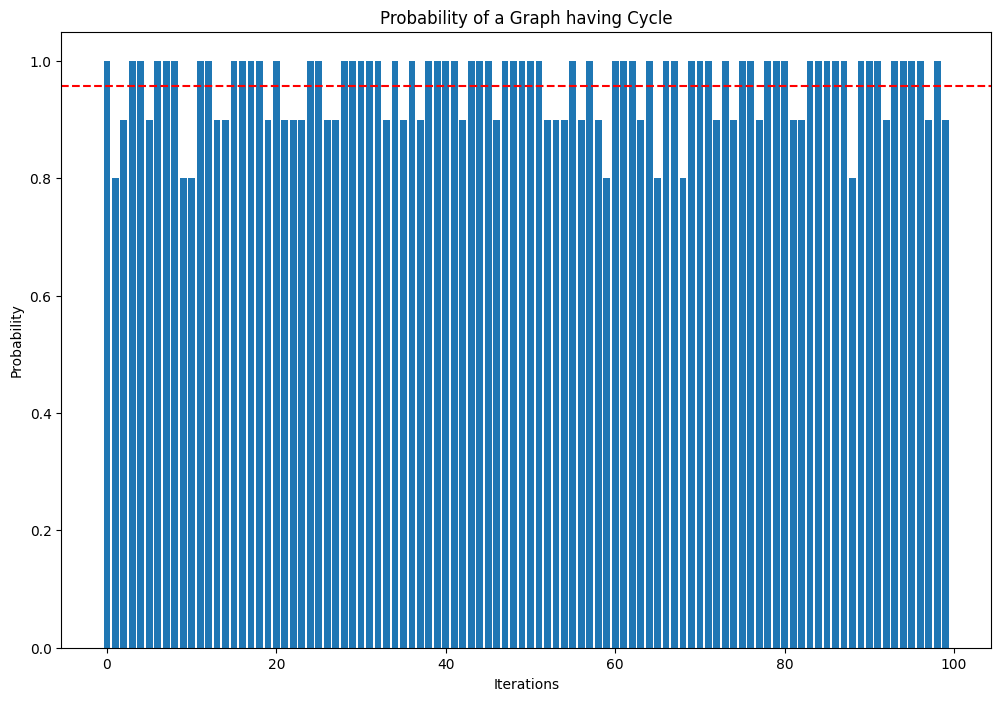

In [247]:
count = 0
cycle_probability = []
runs = 100

for i in range(runs):
    g = GraphI(create_random_graph(10, 15)).get_graph()
    cycle = set(has_cycle(g))
    cycle_probability.append(len(cycle)/10)

x = np.arange(0, len(cycle_probability),1)
fig=plt.figure(figsize=(12,8))
plt.bar(x,cycle_probability)
plt.axhline(np.mean(cycle_probability),color="red",linestyle="--",label="Avg")
plt.xlabel("Iterations")
plt.ylabel("Probability")
plt.title("Probability of a Graph having Cycle")
plt.show()



Our goal in the 1.6 experiment was to comprehend the mechanics of cycle creation in random networks with varying numbers of nodes. To preserve computational efficiency and provide a fair level of confidence in the observed probabilities, 100 iterations were carried out. In order to find cycles, the experiment involved creating random graphs and applying the depth-first search (DFS) algorithm. We purposefully selected 5 edges to allow us to monitor the establishment of cycles as random connections were made, in an environment where cycle formation was conceivable but not assured. Following each graph creation, the probability of a cycle's presence was noted, resulting in a developing trend that was shown in real time.

### 1.7

In [248]:
def depthfirstsearch(G, node):
    stack = [node]
    graph = G
    seen = set()
    connected_vertices = set()

    while stack:
        node = stack.pop()
        if node not in seen:
            seen.add(node)
            connected_vertices.add(node)
            if node in graph:
                for neighbor in graph[node]:
                    stack.append(neighbor)
    return connected_vertices

def count_connected_vertices(graph):
    total_connected_vertices = set()
    for node in graph:
        connected_vertices = depthfirstsearch(graph, node)
        total_connected_vertices.update(connected_vertices)
    return len(total_connected_vertices)


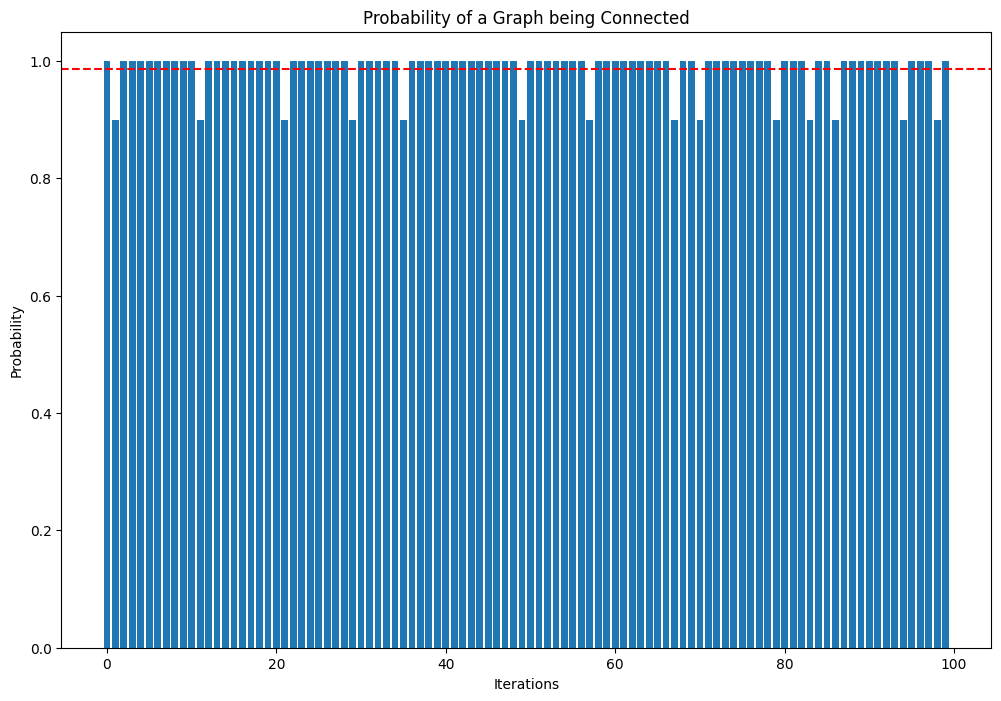

In [249]:
connected_probability = []
runs = 100

for i in range(runs):
    g = GraphI(create_random_graph(10, 15)).get_graph()
    connected_vertices = count_connected_vertices(g)
    connected_probability.append(connected_vertices/10)

x = np.arange(0, len(connected_probability),1)
fig=plt.figure(figsize=(12,8))
plt.bar(x,connected_probability)
plt.axhline(np.mean(connected_probability),color="red",linestyle="--",label="Avg")
plt.xlabel("Iterations")
plt.ylabel("Probability")
plt.title("Probability of a Graph being Connected")
plt.show()



The experiment was designed in a similar way for Part 1.7 in order to evaluate graph connectedness over 100 iterations. In order to obtain a trustworthy estimate and preserve computational feasibility, this quantity of trials was used. Graphs with a fixed number of nodes were iteratively constructed in the experiment, and the impact of changing the edge count on connectivity was investigated. Every graph instance was assessed using a BFS-based connection check. Observing the convergence of the probability and seeing how connectivity changes with different edge densities in random graphs were made easier by the iterative design with real-time probability graphing.

## Part 2

In [114]:
#Use the methods below to determine minimum vertex covers

def add_to_each(sets, element):
    copy = sets.copy()
    for set in copy:
        set.append(element)
    return copy

def power_set(set):
    if set == []:
        return [[]]
    return power_set(set[1:]) + add_to_each(power_set(set[1:]), set[0])

def is_vertex_cover(G, C):
    for start in G.graph:
        for end in G.graph[start]:
            if not(start in C or end in C):
                return False
    return True

def MVC(G):
    nodes = list(G.get_graph().keys())
    subsets = power_set(nodes)
    min_cover = nodes
    for subset in subsets:
        if is_vertex_cover(G, subset):
            if len(subset) < len(min_cover):
                min_cover = subset
    return min_cover


In [182]:
class GraphI:
    def __init__(self, edges):
        self.graph = {}
        for x, y in edges:
            if x not in self.graph.keys():
                self.graph[x] = []
            if y not in self.graph.keys():
                self.graph[y] = []
            self.graph[x].append(y)
            self.graph[y].append(x)  # Assuming undirected graph

    def has_edge(self, src, dst):
        return dst in self.graph.get(src, []) or src in self.graph.get(dst, [])

    def get_graph_size(self):
        return len(self.graph)

    def get_graph(self):
        return self.graph

    def get_highest_degree_vertex(self):
        highest_degree = 0
        highest_degree_vertex = None
        for vertex, edges in self.graph.items():
            if len(edges) > highest_degree:
                highest_degree = len(edges)
                highest_degree_vertex = vertex
        return highest_degree_vertex

    def remove_edges_incident_to(self, vertex):
        if vertex in self.graph:
            for neighbor in self.graph[vertex].copy():
                self.graph[neighbor].remove(vertex)
                if len(self.graph[neighbor]) == 0:
                    del self.graph[neighbor]
            del self.graph[vertex]

    def select_random_edge(self):
        if not self.graph:
            return None
        u = random.choice(list(self.graph.keys()))
        if not self.graph[u]:
            return None
        v = random.choice(self.graph[u])
        return (u, v)

    def is_vertex_cover(self, C):
        for start in self.graph.keys():
            for end in self.graph[start]:
                if not(start in C or end in C):
                    return False
        return True

In [126]:
def Approx1(G):
    C = set()  # Initialize the empty set C
    
    while True:
        v = G.get_highest_degree_vertex()  # Find the vertex with the highest degree
        if v is None:  # If there are no vertices left, break the loop
            break
        C.add(v)  # Add v to C
        G.remove_edges_incident_to(v)  # Remove all edges incident to v
        
        if G.is_vertex_cover(C):  # Check if C is a Vertex Cover
            return C  # If it is, return C
    
    # Fallback, should not reach here if the algorithm works correctly
    return C


def Approx2(G):
    C = set()  # Initialize the empty set C
    
    while True:
        remaining_vertices = [v for v in G.get_graph().keys() if v not in C]
        if not remaining_vertices:  # If there are no remaining vertices, break the loop
            break

        v = random.choice(remaining_vertices)  # Select a vertex randomly that is not in C
        C.add(v)  # Add v to C
        
        if G.is_vertex_cover(C):  # Check if C is a Vertex Cover
            return C  # If it is, return C

    # In case all vertices are added but still not a vertex cover, though unlikely for correct graphs
    return C

def Approx3(G):
    C = set()

    while True:
        edge = G.select_random_edge()
        if not edge:  # If there are no edges left
            break
        u, v = edge
        C.add(u)
        C.add(v)
        G.remove_edges_incident_to(u)
        G.remove_edges_incident_to(v)

        if G.is_vertex_cover(C):
            return C

    return C

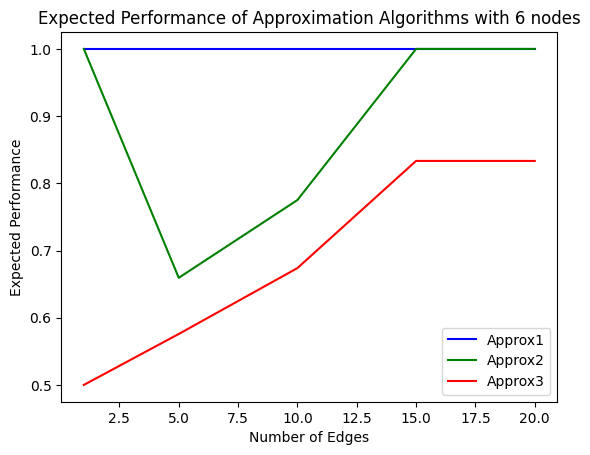

In [127]:
from itertools import combinations

def generate_random_graph(n, e):
    """Generate a random graph with n nodes and e edges."""
    edges = list(combinations(range(n), 2))  # Generate all possible edges
    random.shuffle(edges)  # Shuffle the list of edges
    selected_edges = [list(edge) for edge in edges[:e]]
    return selected_edges

def calculate_mvc_size(graph):
    """Calculate the size of the minimum vertex cover using the brute-force method."""
    return len(MVC(graph))

def calculate_approximation_size(graph, approximation_algorithm):
    """Calculate the size of the vertex cover using the given approximation algorithm."""
    return len(approximation_algorithm(graph))

def evaluate_approximations(n, edge_counts):
    results = {e: {'mvc_sum': 0, 'approx1_sum': 0, 'approx2_sum': 0, 'approx3_sum': 0} for e in edge_counts}
    mvc_baseline_sum = 0 #Baseline sum of MVC sizes
    
    simIter = 2000
    for e in edge_counts:
        for _ in range(simIter):  # Generate and evaluate simIter random graphs
            graph = GraphI(generate_random_graph(n, e))
            original_graph_copy = copy.deepcopy(graph)  # Make a copy for reuse
            
            # Calculate MVC size
            mvc_size = calculate_mvc_size(original_graph_copy)
            results[e]['mvc_sum'] += mvc_size
            mvc_baseline_sum += mvc_size # Accumulate MVC sizes for baseline
            
            # Reset graph to original state for each approximation
            graph_copy = copy.deepcopy(graph)
            results[e]['approx1_sum'] += calculate_approximation_size(graph_copy, Approx1)
            
            graph_copy = copy.deepcopy(graph)
            results[e]['approx2_sum'] += calculate_approximation_size(graph_copy, Approx2)
            
            graph_copy = copy.deepcopy(graph)
            results[e]['approx3_sum'] += calculate_approximation_size(graph_copy, Approx3)
    
    # Calculate and display expected performance
    edge_counts = sorted(edge_counts)
    approx1_performance = []
    approx2_performance = []
    approx3_performance = []

    for e, data in results.items():

        # Calculate the proportion of MVC size sum over baseline for each approximation
        approx1_performance.append(data['mvc_sum'] / data['approx1_sum'])
        approx2_performance.append(data['mvc_sum'] / data['approx2_sum'])
        approx3_performance.append(data['mvc_sum'] / data['approx3_sum'])

    plt.plot(edge_counts, approx1_performance, 'b-', label='Approx1')
    plt.plot(edge_counts, approx2_performance, 'g-', label='Approx2')
    plt.plot(edge_counts, approx3_performance, 'r-', label='Approx3')

    # Graph settings
    plt.xlabel('Number of Edges')
    plt.ylabel('Expected Performance')
    plt.title(f'Expected Performance of Approximation Algorithms with {n} nodes')
    plt.legend()
    plt.show()

# Example usage
edge_counts = [1, 5, 10, 15, 20]
evaluate_approximations(6, edge_counts)

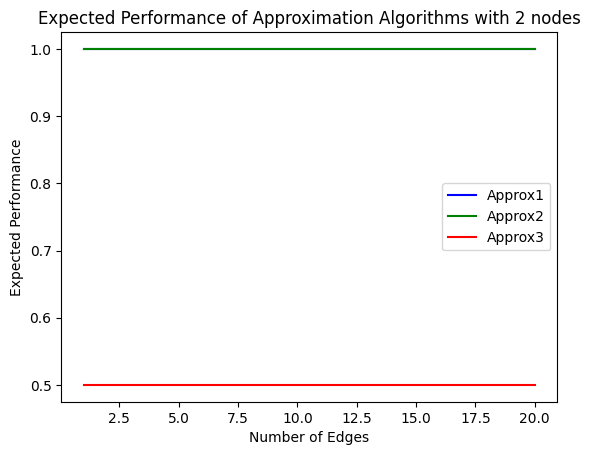

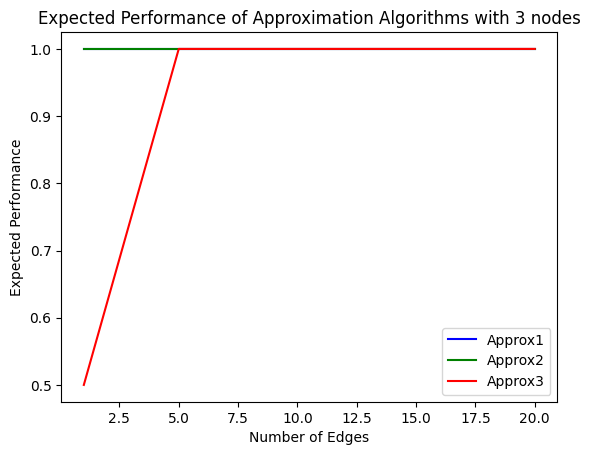

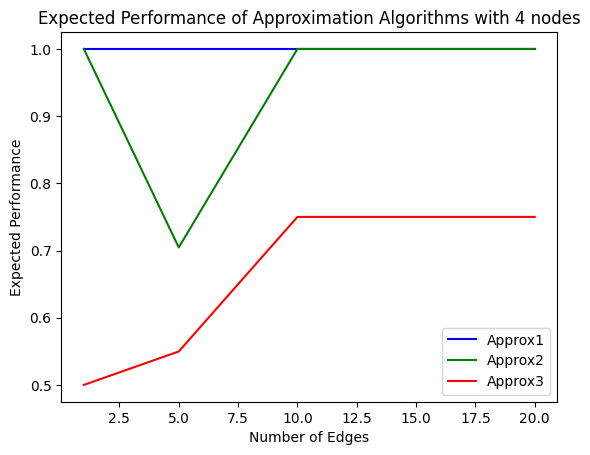

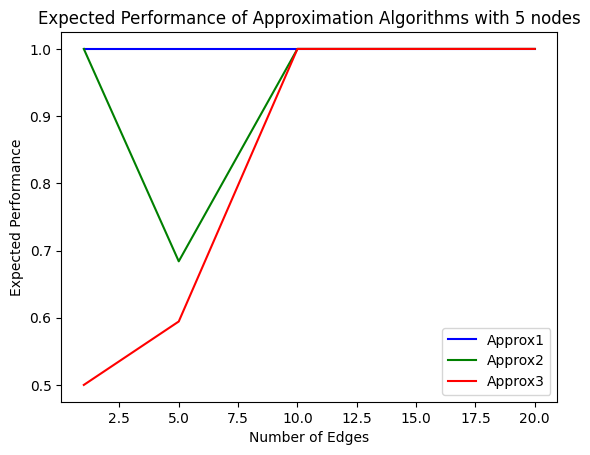

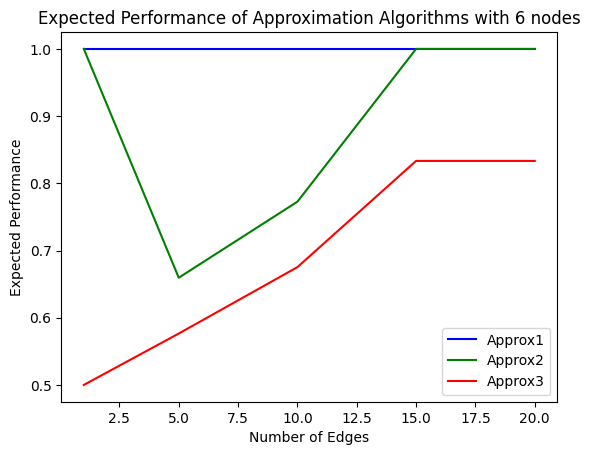

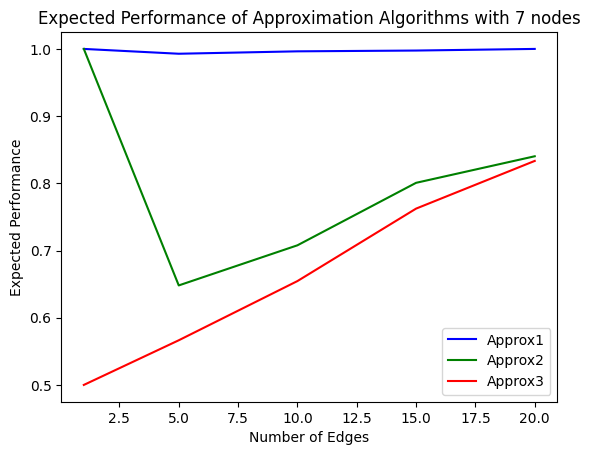

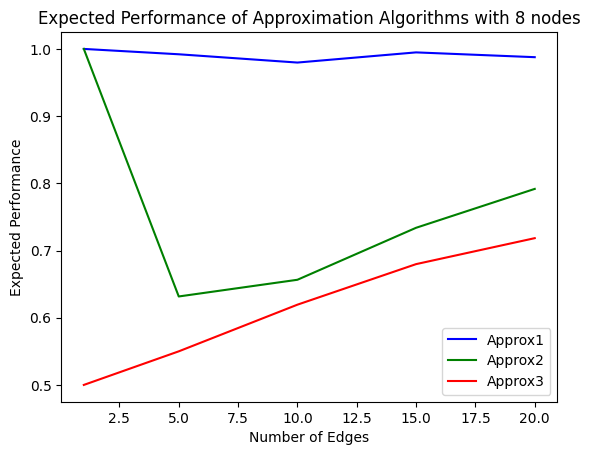

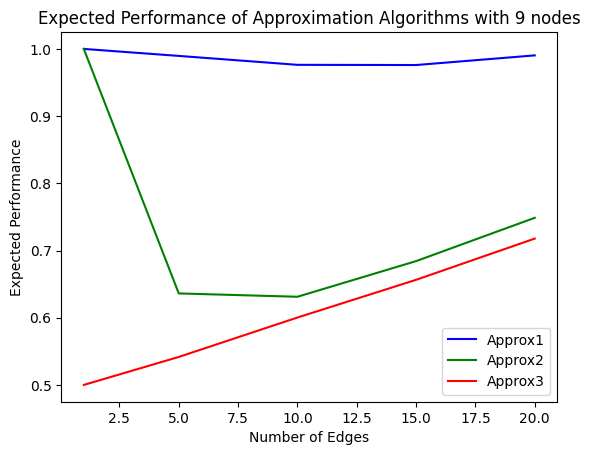

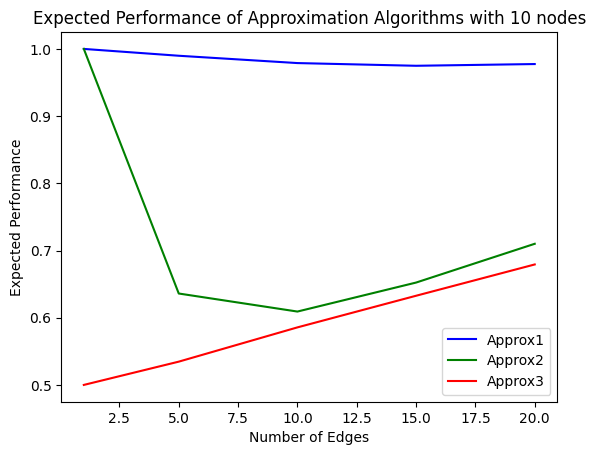

In [122]:
for numNodes in range(2,11):
    evaluate_approximations(numNodes,edge_counts)

In [123]:
def generate_all_graphs(n):
    vertices = list(range(n))
    all_edges = list(combinations(vertices, 2))
    num_edges = len(all_edges)

    for i in range(2**num_edges):
        edges = [all_edges[j] for j in range(num_edges) if (i >> j) & 1]
        yield GraphI(edges)

In [124]:
def compare_mvc_approx1(n):
    worst_ratio = 1
    for graph in generate_all_graphs(n):
        original_edges = [(v, w) for v, neighbors in graph.graph.items() for w in neighbors if v < w]
        mvc = MVC(GraphI(original_edges))  # Use MVC function here
        approx_cover = Approx1(GraphI(original_edges))  # Recreate graph for Approx1
        ratio = len(approx_cover) / (len(mvc) if mvc else 1)
        worst_ratio = max(worst_ratio, ratio)
    return worst_ratio


n = 5
worst_ratio = compare_mvc_approx1(n)
print(f"Worst-case ratio of Approx1 to MVC for graphs of size {n}: {1/worst_ratio}")

Worst-case ratio of Approx1 to MVC for graphs of size 5: 0.6666666666666666


**Reflections for part 2.4**

**Is there a relationship between how good we would expect an approximation to be and the number of edges in a graph? In general, does the approximation get better/worse as the number of edges increases/decreases?**

We expect that as the number of edges increases, Approx1 will generally perform better compared to Approx2 and Approx3. This is because Approx1 prioritizes vertices with the highest degree, which tends to cover more edges efficiently, especially in dense graphs. On the other hand, Approx2 and Approx3 may perform better as the number of edges increases due to the increased likelihood of randomly selecting vertices or edges that contribute to a vertex cover.

**Is there a relationship between how good we would expect an approximation to be and the number of nodes in a graph? In general, does the approximation get better/worse as the number of nodes increases/decreases?**

The relationship between the number of nodes and the quality of the approximation can vary based on the structure of the graph. However, in general, we might expect that as the number of nodes increases, the performance of Approx1 may remain relatively stable or improve slightly due to having more vertices to select from based on degree. For Approx2 and Approx3, the relationship may be less predictable due to their random selection strategies.

**The approach described in the Potential Experiment is getting at the average performance of the approximation. What about the worst case of the approximation? To figure that out we would have to test our approximations on every single graph for approx1(). And for the other two the non-deterministic nature of the algorithms makes this even more problematic. However, we maybe able to test the worst case for approx1() on very small graphs. How would you generate all graphs of size 5 for example?**

To generate all graphs of size 5, we would create all possible combinations of edges among the 5 nodes. Since the worst-case scenario for Approx1 involves a specific arrangement of vertices and edges, we would need to test each of these combinations to identify the worst-case scenario. However, this approach may not be feasible for larger graphs due to the exponential increase in the number of possible combinations.

### 2.5

In [118]:
def get_lowest_degree_vertex(graph):
        lowest_degree = math.inf
        lowest_degree_vertex = None
        for vertex, edges in graph.items():
            if len(edges) < lowest_degree:
                lowest_degree = len(edges)
                lowest_degree_vertex = vertex
        return lowest_degree_vertex


def MIS(G):
    graph = G.get_graph()
    keys = list(graph.keys())
    mis = set()
    while len(keys) != 0:
        current_key = get_lowest_degree_vertex(graph)
        mis.add(current_key)
        for adj_node in graph[current_key]:
            if adj_node in keys:
                keys.remove(adj_node)
                graph.pop(adj_node)
        keys.remove(current_key)
        graph.pop(current_key)
        
    return mis

### 2.6

Randomly generated graph with  7  vertices: {1: [5, 4, 0, 2, 3], 5: [1, 3], 4: [1, 2, 6], 0: [1, 3, 2], 2: [1, 0, 4, 3], 3: [0, 6, 1, 5, 2], 6: [3, 4]}
The Maximum Independent Set for the graph is:  {0, 5, 6}
The Minimal Vertex Cover for the graph is:  [6, 3, 2, 1]


Randomly generated graph with  9  vertices: {0: [3, 1], 3: [0, 6, 5, 4], 2: [4, 1, 7], 4: [2, 8, 7, 3], 1: [2, 0], 6: [3, 8], 8: [4, 6, 7], 7: [4, 8, 2], 5: [3]}
The Maximum Independent Set for the graph is:  {0, 2, 5, 6}
The Minimal Vertex Cover for the graph is:  [7, 8, 1, 4, 3]


Randomly generated graph with  11  vertices: {3: [7, 2, 6, 4, 1], 7: [3, 9, 8], 2: [3, 0, 10, 5], 0: [2], 6: [3, 8, 1], 9: [7], 8: [6, 7], 4: [3], 10: [2], 1: [3, 6], 5: [2]}
The Maximum Independent Set for the graph is:  {0, 1, 4, 5, 8, 9, 10}
The Minimal Vertex Cover for the graph is:  [6, 2, 7, 3]


Randomly generated graph with  13  vertices: {2: [6, 11, 3], 6: [2, 12, 10], 0: [3], 3: [0, 2], 11: [2, 7, 10, 9], 12: [6, 10], 1: [10], 10: [1,

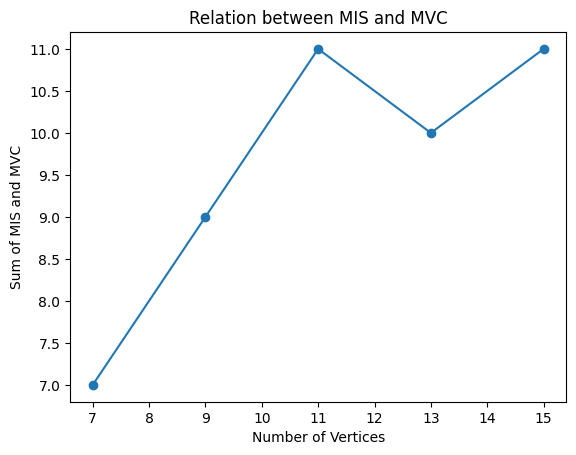

In [119]:
vertices = [7,9,11,13,15]
sum1 = []
for v in vertices:
    graph = generate_random_graph(v,12)
    mis_graph = GraphI(graph)
    mvc_graph = GraphI(graph)
    mg = mis_graph.get_graph()
    print("Randomly generated graph with ",v," vertices:", mg)
    mis = MIS(mis_graph)
    mvc = MVC(mvc_graph)
    print("The Maximum Independent Set for the graph is: ",mis)
    print("The Minimal Vertex Cover for the graph is: ",mvc)
    print('\n')
    sum1.append(len(mis)+len(mvc))

# Plotting the line chart
plt.plot(vertices, sum1, marker='o', linestyle='-')

# Adding labels and title
plt.xlabel('Number of Vertices')
plt.ylabel('Sum of MIS and MVC')
plt.title('Relation between MIS and MVC')

# Display the plot
plt.show()


Reflection:
The graph above shows the relation between the number of vertices of a graph and the sum of minimal vertex cover and maximum independent set of that graph.
From the graph we can see that the relation is linear which means 
MVC(G) + MIS(G) = |V|, where |V| is the number of vertices in the graph.

### 2.7

In [82]:
num_graphs = 100

# Number of nodes and edges for each graph
num_nodes = 10
num_edges = 15

# Track sum of sizes of MIS and MVC
mis_mvc_sum = 0

# Generate random graphs and inspect MIS and MVC
for _ in range(num_graphs):
    ggraph = generate_random_graph(10,15)
    mis_graph = GraphI(graph)
    mvc_graph = GraphI(graph)
    mis = MIS(mis_graph)
    mvc = MVC(mvc_graph)
    mis_mvc_sum += len(mis) + len(mvc)

# Calculate average sum of MIS and MVC sizes
average_sum = mis_mvc_sum / (num_graphs * 2)

print("Average sum of sizes of MIS and MVC:", average_sum)
print("Number of vertices in each graph:", num_nodes)

Average sum of sizes of MIS and MVC: 5.0
Number of vertices in each graph: 10


Reflection:
We calculated the MIS and MVC of a graph with 10 vertices and 15 edges for 100 times and calculated the average sum to be 5.0 which is exactly half of the number of vertices in the graph.
This suggests a strong relationship between the sizes of MIS and MVC.
The observation that the average sum of the sizes of MIS and MVC is equal to half the number of nodes in each graph aligns with the theoretical relationship between MIS and MVC. According to the relationship, for any graph, the size of the MIS plus the size of the MVC equals the total number of nodes in the graph.
This observation confirms that the sizes of MIS and MVC are complementary in a graph. In other words, the larger the MIS in a graph, the smaller the MVC, and vice versa. This has implications for various graph-related problems and algorithms, as understanding the relationship between MIS and MVC can help in developing more efficient solutions.